# 03-超参数和网格搜索

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets


In [3]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
X = digits.data
X.shape

(1797, 64)

In [8]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [13]:
X[:10,:]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

* 显示数据集中的某一个样本的图像

In [15]:
some_digit = X[666]
y[666]

0

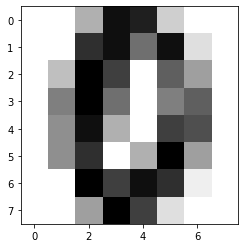

In [16]:
plt.imshow(some_digit.reshape(8,8),cmap='binary')

In [17]:
def train_test_split(X, ptg):
    n = int(ptg*X.shape[0])
    if X.ndim == 1:
        return X[:n],X[n:]
    return np.vsplit(X,[n])

In [18]:
X.shape

(1797, 64)

In [19]:
X_train, X_test = train_test_split(X,0.8)
X_train.shape

(1437, 64)

In [20]:
y_train, y_test = train_test_split(y, 0.8)
y_train.shape

(1437,)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

k = 6
ptg = 0.6
my_knn_classifier = KNeighborsClassifier(n_neighbors=k)

X_train, X_test = train_test_split(X,ptg)
y_train, y_test = train_test_split(y,ptg)

my_knn_classifier.fit(X_train,y_train)
y_pred = my_knn_classifier.predict(X_test)
accuracy = np.sum(y_pred==y_test) / y_test.shape[0]
accuracy

0.9582753824756607

* 或者我们也可以直接调用sklearn封装好的方法——score来获取准确率，同时注意该方法只需要传入测试特征数据和目标向量即可。

In [22]:
my_knn_classifier.score(X_test, y_test)

0.9582753824756607

In [ ]:
performance = {}
for k in range(2,X_test.shape[0]//2):
    my_knn_classifier = KNeighborsClassifier(n_neighbors=k)
    my_knn_classifier.fit(X_train,y_train)
    accuracy = my_knn_classifier.score(X_test, y_test)
    performance[k] = accuracy

In [ ]:
plt.plot(performance.keys(), performance.values())

```超参数```：  

在运行机器学习算法前，有一些参数必须**提前指定**。比如在 KNN 算法中，k 就是超参数。  

与超参数相对的参数叫做**模型参数**，即算法过程中的学习参数。kNN 算法没有模型参数。  

**调参**指的是调整超参数，获得更好的模型效果。

**如何确定一个好的超参数？**  

1. 具有待解决问题相关领域的知识；  
2. 机器学习库封装的默认数值，即相对较好的经验数值；比如KNN的默认k值为5；  
3. 实验搜索——尝试测试不同的k值，最终取效果最好的k值。

### 寻找好的k值

In [26]:
best_score = 0.0
best_k = -1
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = k
print(best_score, best_k)

0.9680111265646731 3


在这种情况下，我们找到的最好的k值是3， 对应的准确率是0.968；  
另外，如果我们找到的最好k值为10，有必要对10以上的k值再次进行搜索。因为一般来说，k值对应的准确率的变化是连续的，如果我们发现10作为一个1-10的边界k值，意味着10不一定是最好的，此时有必要检查大于10的k值对应的准确率。

* k值并非是KNN算法唯一的超参数。  

<img src="resource/k.png" style="zoom:40%">

* 普通的kNN算法中，当k=3，我们只看离黄色点最近的三个节点的颜色中，谁的数量多。比如现在按照之前讲的KNN算法，黄色节点的预测分类应该是绿色。但实际上黄色节点离红色节点更近，只是由于样本恰好是绿色多于红色的分布，会导致我们预测黄色节点的分类为绿色。

* 如何对普通的kNN算法进行改进呢？我们可以将三个节点到黄色节点的距离的权重考虑进去。比如红色节点距离黄色节点近，那么在“投票”环节，它应该有更高的权重。  
<img src="resource/改进knn.png" style="zoom:40%">  

如果我们认为权重为距离的倒数：  
红色：1；
绿色：1/2 + 1/5 = 7/10  
红色胜  

这样做的另一个好处在于**“避免平票”**

* 第二个超参数——weights

In [27]:
best_method = ""
best_score = 0.0
best_k = -1
for method in ("uniform","distance"):
    for k in range(1,11):
        knn_clf = KNeighborsClassifier(n_neighbors=k,weights=method)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_k = k
            best_method = method
print(best_score, best_k, best_method)

0.9680111265646731 3 uniform


* 第三个超参数——距离  

1. 曼哈顿距离：  
$$\Sigma_{i=1}^{n}|X_{i}^{(a)}-X_{i}^{(b)}|$$   

2. 欧拉距离：  
$$(\Sigma_{i=1}^{n}|X_{i}^{(a)}-X_{i}^{(b)}|^{2})^{1/2}$$

<img src="resource/曼哈顿距离.jpg" style="zoom:40%">  
3. 明可夫斯基距离（经过推广的曼哈顿、欧拉距离）
$$(\Sigma_{i=1}^{n}|X_{i}^{(a)}-X_{i}^{(b)}|^{p})^{1/p}$$

p = 1，即曼哈顿距离；  
p = 2, 欧拉距离；  

第三个超参数——p  


In [64]:
best_p = -1
best_score = 0.0
best_k = -1
for k in range(1,11):
    for p in range(1,6):
        knn_clf = KNeighborsClassifier(n_neighbors=k,weights="distance",
                                      p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_k = k
            best_p = p
print(best_score, best_k, best_p)

0.9707927677329624 3 4


即使对于knn如此简单的算法，也有很多的超参数；寻找最好的超参数的方法可以使用搜索的方法。我们目前使用的搜索策略称之为——网格搜索。网格搜索的意识是采用我们目前多重循环的形式，判断每一种超参数的组合，寻找最好的超参数。

### GridSearch  

为了便于使用，sklearn封装好了网格搜索的方法。

In [66]:
# 定义需要搜索的参数  

param_grid = [{
                 "weights":['uniform',"distance"],
                 "n_neighbors":[i for i in range(2,11)],
                 "p":[i for i in range(1,6)]
              }]

In [67]:
knn_clf = KNeighborsClassifier()

In [68]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf, param_grid)

In [69]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5],
                          'weights': ['uniform', 'distance']}])

In [70]:
grid_search.best_estimator_ # 最好的分类器

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [71]:
grid_search.best_estimator_.predict(X_test)

array([0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0,
       9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7,
       6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2,
       5, 7, 3, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8,
       9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 8, 2, 3, 4, 5, 6, 7, 8, 9, 0,
       9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7,
       8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5,
       2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 2, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8,
       4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 8, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7,
       9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5,
       5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2,
       0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 6, 2, 8,
       3, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3,

In [72]:
grid_search.best_estimator_.score(X_test, y_test)

0.9638386648122392

In [73]:
grid_search.best_params_ # 最好分类器的参数

{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [74]:
grid_search.best_score_ # 准确性

0.9592032730404825

* 为什么准确性分数更低了？  

因为GridSearch使用的准确性评分是有区别的，这就是GridSearchCV中CV的缘故。CV指 cross validation，为交叉验证法。  

* 交叉验证法：  

我们原先只是很简单的把数据集直接分成两部分，一部分训练模型，另一个部分测试模型。但由于这是随机的原始分组，所以最后模型的准确率的高低和数据原始分组有较大的关系。交叉验证法的全程是k-cross-validation,将数据集分为大小相等的k份，进行k次模型训练，每次都使用不同的一份作为测试数据集，剩下的9份是训练数据集，最终模型的准确性由k次准确性的均值来衡量。一般来说k是大于2的。在当前的GridSearchCV模块中，k值默认为5。

* GridSearchCV 可以传入更多的参数。。。  

n_jobs: cpu使用几个核用于网格搜索；-1表示全部的核都用来进行搜索。 


In [81]:
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5],
                          'weights': ['uniform', 'distance']}])